# Anomaly Detection & Time Series

**Q1.** What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

- Anomaly Detection is a process used in data analysis and machine learning to identify data points, patterns, or events that deviate significantly from the expected behavior or norm. These anomalies, also called outliers, can indicate important and rare occurrences such as fraud, network intrusions, equipment failures, or data errors. Anomaly detection helps in monitoring, risk management, and decision-making by highlighting unusual behavior that could require further investigation.

  There are three main types of anomalies:

1. Point Anomalies – A single data point is considered anomalous if it is significantly different from the rest of the dataset.
   
   Example: In a dataset of daily temperatures where most values range between 20°C and 25°C, a sudden temperature of 40°C would be a point anomaly.

2. Contextual Anomalies – A data point is anomalous in a specific context but might be normal otherwise. The anomaly depends on the surrounding information or conditions.
   
   Example: A temperature of 30°C might be normal in summer but anomalous in winter. Thus, context (season) defines whether the value is an anomaly.

3. Collective Anomalies – A group of related data points together form an anomaly, even if individual points may appear normal when viewed in isolation.
   
   Example: In network traffic data, a sudden burst of numerous requests within a short period may indicate a DDoS attack, even if each request by itself seems normal.

**Q2.** Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

- Key Differences

1. Approach:

* Isolation Forest focuses on isolating anomalies using random partitioning.

* DBSCAN groups points based on density and marks sparse regions as anomalies.

* LOF compares local densities, identifying outliers that differ from neighbors.

2. Handling Data:

* Isolation Forest works well on high-dimensional datasets and is computationally efficient.

* DBSCAN struggles with varying densities but is good at finding arbitrarily shaped clusters.

* LOF excels in datasets with uneven density and contextual anomalies.

3. Parameter Sensitivity:

* Isolation Forest is relatively less sensitive to parameters and requires fewer settings.

* DBSCAN needs careful tuning of epsilon and minPts.

* LOF requires specifying the number of neighbors, which affects its performance.

  Summary:

* Use Isolation Forest when dealing with large, high-dimensional datasets and when fast, efficient anomaly detection is required without heavy tuning.

* Use DBSCAN when anomalies are defined as points in sparse regions, especially with spatial or clustering tasks.

* Use LOF when anomalies are defined relative to local neighborhoods, useful in datasets with varying density and patterns.

**Q3.**  What are the key components of a Time Series? Explain each with one
example.

- Key Components of a Time Series

  A time series is a sequence of data points collected or recorded at successive points in time. It usually consists of several components that explain the patterns and trends in the data. The key components are:

1. Trend:

   Definition: The long-term increase or decrease in the data over time.

   Example: The steady rise in a country's population over several years.

2. Seasonality:

   Definition: A repeating pattern or cycle of fluctuations over a fixed period, such as hours, days, months, or years.

   Example: Higher ice cream sales every summer compared to other seasons.

3. Cyclicality (Cycle):

   Definition: Fluctuations that occur over longer, irregular periods due to economic, political, or other factors.

   Example: Business cycles where the economy grows and contracts over several years.

4. Irregular/Random Component (Noise):

   Definition: Unpredictable variations or random shocks in the data that cannot be attributed to trend, seasonality, or cycle.

   Example: Sudden stock market drops due to unexpected global events like natural disasters.

**Q4.** Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

- Stationary in Time Series means that the statistical properties of the series, such as mean, variance, and autocorrelation, remain constant over time. In other words, a stationary time series does not show trends, seasonal effects, or changing variability as time progresses. Stationarity is essential in time series analysis because many forecasting methods assume that the underlying data behavior does not change over time. A stationary series makes it easier to model and predict future values since the patterns observed in the past are likely to persist.

  To test for stationarity, one can use methods like the Augmented Dickey-Fuller (ADF) test, KPSS test, or Phillips-Perron test, which statistically check whether a unit root is present or whether the mean and variance are stable over time. If a series is found to be non-stationary, it can be transformed into a stationary series by techniques such as differencing (subtracting the previous observation from the current one), log transformation (applying a logarithmic scale to stabilize variance), detrending (removing trends using regression), or seasonal adjustment (removing seasonal effects). These transformations help stabilize the statistical properties, making the data suitable for accurate modeling and forecasting.

**Q5.** Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

- Differences Between AR, MA, ARIMA, SARIMA, and SARIMAX Models
1. AR (Auto-Regressive) Model

- Structure:

   - Uses past values of the series to predict current values.

   - Depends on the relationship between an observation and a number of lagged observations.

- Application:

   - Suitable for stationary time series with autocorrelation.

   - Used when past values influence current trends, such as stock prices.

2. MA (Moving Average) Model:

- Structure:

   - Uses past forecast errors to predict current values.

   - The model smooths the data by averaging past error terms.

- Application:

   - Works well when random shocks or noise impact the series.

   - Used to correct for irregularities and noise in data.

3. ARIMA (Auto-Regressive Integrated Moving Average)

- Structure:

   - Combines AR and MA components with differencing (integration) to make a series stationary.

  - Represented as ARIMA(p, d, q), where:

     p = number of AR terms,

     d = order of differencing,

     q = number of MA terms.

- Application:

   - Used for both stationary and non-stationary series.

   - Ideal for forecasting economic indicators, sales data, and trends.

4. SARIMA (Seasonal ARIMA)

- Structure:

   - Extends ARIMA by adding seasonal components.

   - Represented as SARIMA(p, d, q)(P, D, Q, m), where:

      P, D, Q = seasonal autoregressive, differencing, and moving average terms,

      m = length of the seasonal cycle.

- Application:

    - Used for series with strong seasonal patterns, like weather data or monthly sales.

5. SARIMAX (Seasonal ARIMA with Exogenous Variables)

- Structure:

    - Adds external variables (exogenous regressors) to the SARIMA model.

    - Helps model the impact of outside factors alongside seasonal and trend components.

- Application:

    - Used when external influences like holidays, promotions, or economic policies affect the series.

    - Applied in demand forecasting, financial modeling, and policy analysis.



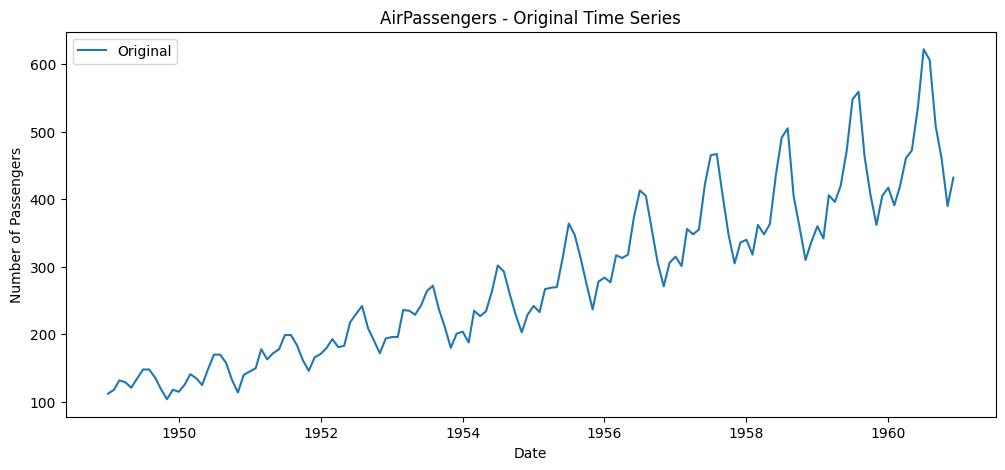

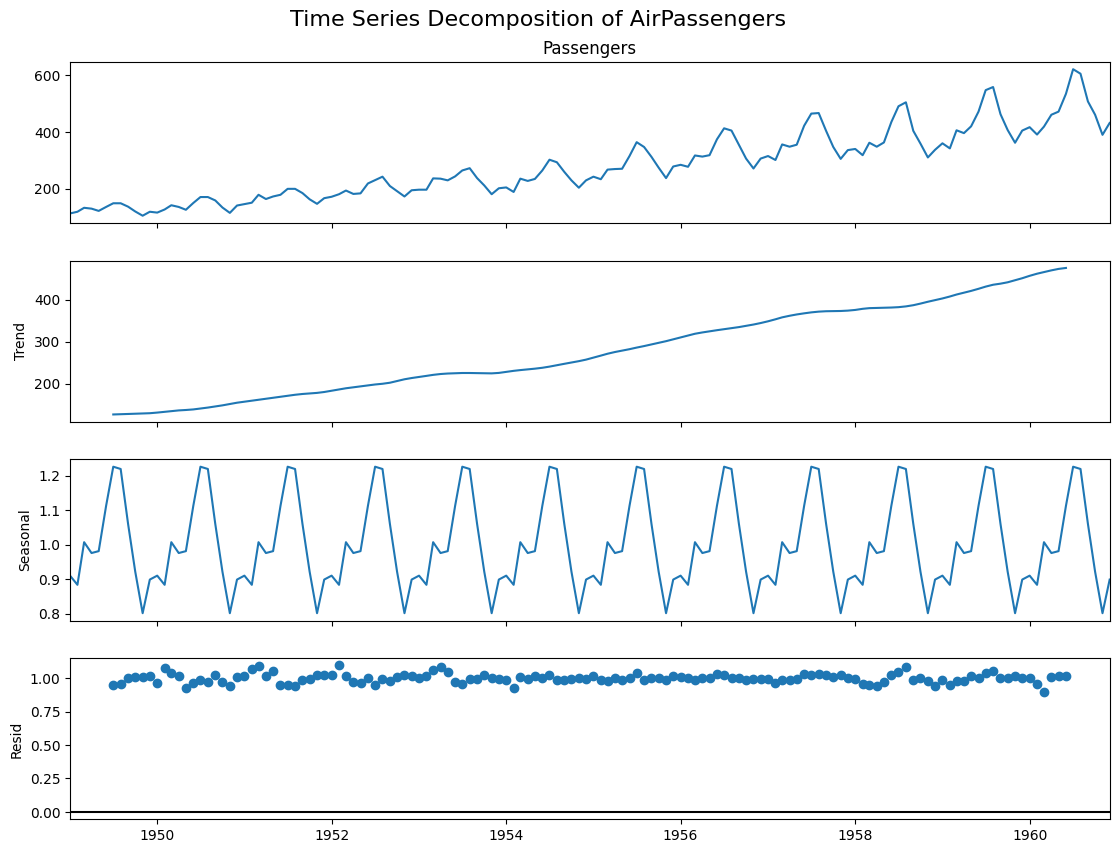

In [10]:
#Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(data['Passengers'], label='Original')
plt.title('AirPassengers - Original Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

fig = decomposition.plot()
fig.set_size_inches(12, 9)
plt.suptitle('Time Series Decomposition of AirPassengers', fontsize=16)
plt.show()


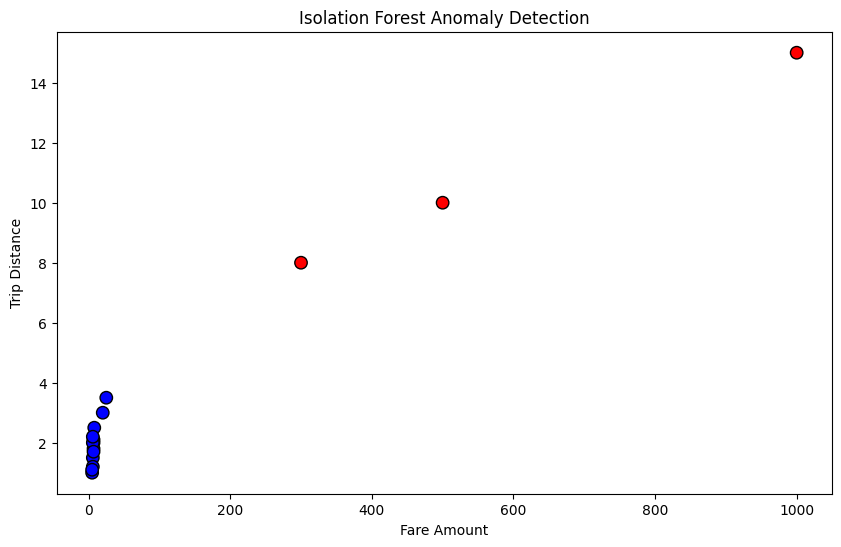

In [ ]:
#Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

data = pd.DataFrame({
    'fare_amount': [5, 7, 6, 20, 25, 6, 7, 500, 7, 6, 8, 300, 7, 6, 5, 1000],
    'trip_distance': [1, 2, 1.5, 3, 3.5, 1.2, 2.1, 10, 1.8, 2, 2.5, 8, 1.7, 2.2, 1.1, 15]
})

iso_forest = IsolationForest(contamination=0.2, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['fare_amount', 'trip_distance']])

plt.figure(figsize=(10, 6))
colors = {1: 'blue', -1: 'red'}

plt.scatter(data['fare_amount'], data['trip_distance'],
            c=data['anomaly'].map(colors), edgecolor='k', s=80)

plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-4076440337.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=train_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


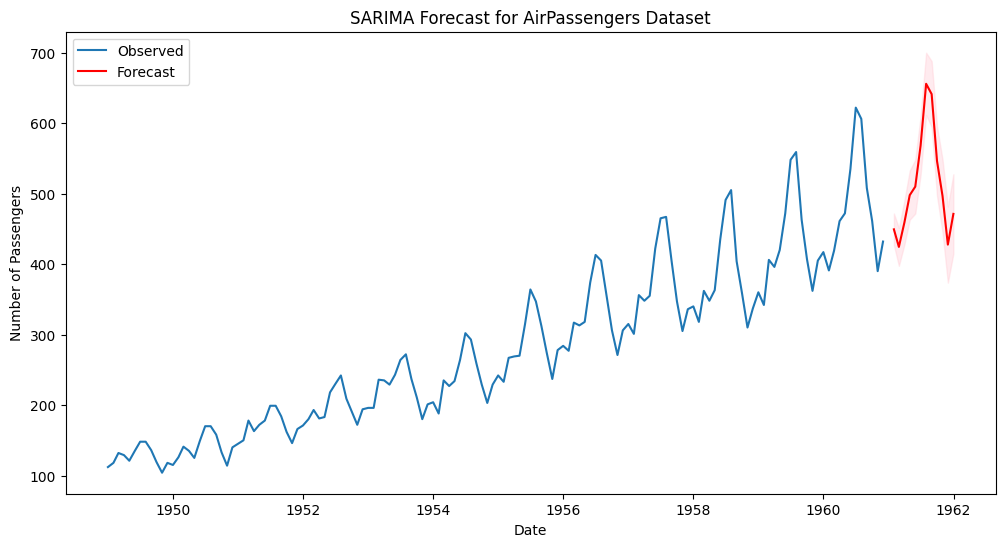

In [8]:
#Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

train_data = data['Passengers']

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = model.fit(disp=False)

forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=train_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')

plt.fill_between(forecast_index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

plt.title('SARIMA Forecast for AirPassengers Dataset')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


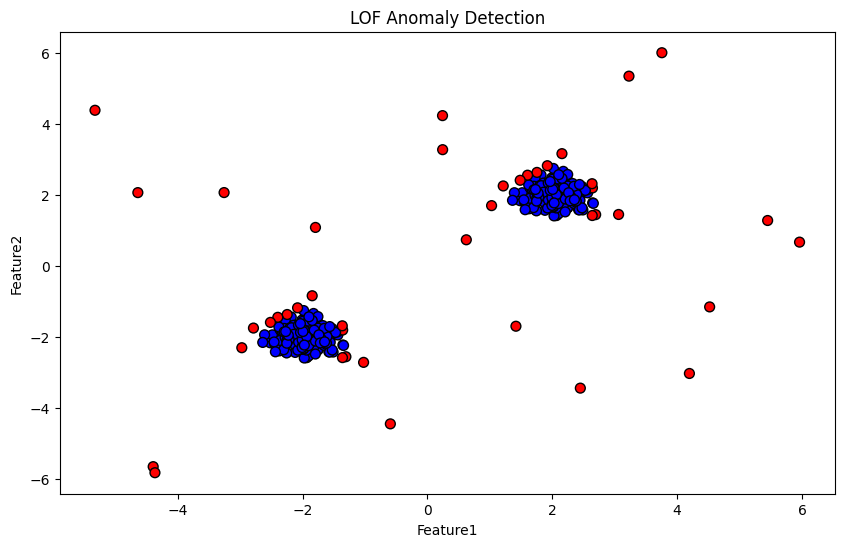

In [9]:
#Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(200, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))

X = np.r_[X_inliers, X_outliers]
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(data)

data['Anomaly'] = y_pred

plt.figure(figsize=(10, 6))
colors = {1: 'blue', -1: 'red'}

plt.scatter(data['Feature1'], data['Feature2'],
            c=data['Anomaly'].map(colors), edgecolor='k', s=50)

plt.title('LOF Anomaly Detection')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


**Q10.** You are working as a data scientist for a power grid monitoring company.Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?


### Real-Time Data Science Workflow for Energy Demand Forecasting and Anomaly Detection

- I am working as a data scientist for a power grid monitoring company, and my responsibility is to forecast energy demand and identify abnormal spikes or drops in energy consumption using real-time data collected every 15 minutes. The data includes features such as timestamp, region, weather conditions, and energy usage. Below is how I would approach this problem step by step:


### 1. Detecting Anomalies in Streaming Data

  To detect anomalies in real-time energy consumption, I would use algorithms like Isolation Forest or Local Outlier Factor (LOF) because they are well-suited for handling streaming data with noise and sudden changes.

* Isolation Forest is efficient for large datasets and works by isolating data points that are different from the rest of the data. Since it requires fewer assumptions about the data distribution, it's ideal for quickly spotting unusual spikes or drops without retraining frequently.

* Local Outlier Factor (LOF) looks at how dense the data points are in a local neighborhood. It’s useful for identifying points that suddenly deviate from their nearby measurements, like sudden consumption surges due to extreme weather or technical faults.

For real-time detection, I would process data in small batches or windows (e.g., last hour or day) and continuously update the model with new incoming data.


### 2. Choosing a Time Series Model for Short-Term Forecasting

For short-term forecasting of energy demand, I would choose SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with Exogenous variables) because:

* Energy demand follows daily and weekly seasonal patterns, which SARIMAX handles well with its seasonal components.
* It allows incorporating external factors like weather, temperature, and region-based variables as regressors, improving prediction accuracy.
* It can forecast over short horizons (next few hours or days), which is critical for planning energy distribution and avoiding overloads.


### 3. Validating and Monitoring Performance Over Time

To ensure that the model works well and adapts to changing conditions, I would:

* Use rolling or expanding windows to retrain and update the model with the latest data.
* Validate using metrics like MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and MAPE (Mean Absolute Percentage Error) by comparing predictions with actual energy usage.
* Implement drift detection to identify when the model's accuracy starts degrading due to changes in consumption patterns.
* Set up alerts when prediction errors exceed acceptable thresholds, so analysts can intervene.

### 4. How This Solution Helps Business Decisions or Operations

This solution directly supports the company’s operations by:

* Improving energy distribution efficiency: Accurate forecasts allow power plants to allocate resources optimally and avoid wastage.
* Preventing outages: Real-time anomaly detection helps spot unusual spikes or drops that could signal technical issues or abnormal usage.
* Reducing costs: By forecasting demand more precisely, the company can purchase or allocate energy at the right times, minimizing overproduction or shortages.
* Enhancing customer satisfaction: Stable and reliable energy supply ensures that customers experience fewer disruptions.
* Planning for future events: By analyzing patterns, the company can prepare for extreme weather or special events that impact energy demand.


### Final Thoughts

By combining real-time anomaly detection using Isolation Forest or LOF with short-term forecasting through SARIMAX, and continuously validating the models, we can build a robust system that helps the company operate more efficiently, respond quickly to unusual events, and plan better for future energy needs. This approach ensures both technical excellence and tangible benefits for the business.
